In [1]:
import torch
from torch_geometric.data import Data
# draw the graph
import networkx as nx
import matplotlib.pyplot as plt
# summary
from torchinfo import summary
# graphnet
from graphnet.models.gnn import DynEdgeTITO

/home/xt/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


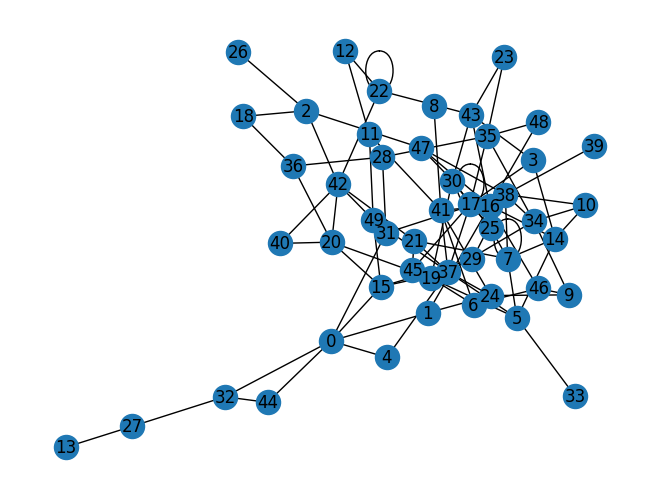

In [5]:
# 50 nodes, each node has 6 features
x = torch.rand((50, 6))
# randomly generate 100 edges in this graph
# the number of edges can be anything >= 0 and <= 50!
edge_index = torch.randint(low=0, high=50, size=(2, 100), dtype=torch.long)
# batch
batch = torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                      0, 0, 0, 0, 0, 0, 0, 0, 1, 2
                      ], dtype=torch.long)
# n_pulses
n_pulses = torch.tensor([1, 1, 1])
# n_pulses = torch.tensor([1.1, 1])
# put the data together by torch_geometric.data.Data
data = Data(x=x, edge_index=edge_index, batch=batch, n_pulses = n_pulses)

# draw the graph
def visualize(data):
    G = nx.Graph()
    G.add_nodes_from(range(data.x.size(0)))
    G.add_edges_from(data.edge_index.t().tolist())
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()

visualize(data)

In [6]:
model = DynEdgeTITO(nb_inputs=6)
summary(model)

graphnet [MainProcess] INFO     2023-09-30 07:38:37 - DynEdgeTITO.__init__ - Writing log to logs/graphnet_20230930-073837.log


Layer (type:depth-idx)                                                      Param #
DynEdgeTITO                                                                 --
├─LeakyReLU: 1-1                                                            --
├─ModuleList: 1-2                                                           --
│    └─DynTrans: 2-1                                                        --
│    │    └─MaxAggregation: 3-1                                             --
│    │    └─Sequential: 3-2                                                 70,656
│    │    └─LayerNorm: 3-3                                                  512
│    │    └─TransformerEncoder: 3-4                                         1,315,072
│    └─DynTrans: 2-2                                                        --
│    │    └─MaxAggregation: 3-5                                             --
│    │    └─Sequential: 3-6                                                 262,656
│    │    └─LayerNorm: 3-7    

In [7]:
output = model(data)
print(output)
print(output.shape)# [number_of_pulses, 128]

tensor([[-3.6350e-04, -1.9163e-04, -7.0395e-04, -2.2686e-04,  2.8928e-02,
          4.2275e-02, -7.2586e-04,  2.0321e-02,  2.4452e-02, -6.0511e-04,
          1.0015e-01, -7.3308e-05, -2.9564e-04,  1.2035e-02,  4.0361e-02,
         -5.5509e-04,  3.7365e-02, -6.4753e-04,  4.6949e-02,  4.9004e-03,
         -9.2182e-04, -8.2552e-04,  4.3063e-03, -8.6832e-04, -5.9814e-04,
         -4.5722e-05, -4.5951e-04, -4.8514e-04, -5.0528e-04, -1.3924e-03,
          1.3027e-01, -9.3394e-04, -1.0810e-03,  2.0529e-02, -4.4784e-04,
          1.4109e-01,  5.1041e-02,  3.9840e-02, -7.4816e-04,  7.5211e-02,
         -9.3454e-04,  6.9740e-02,  4.9552e-03,  1.0427e-01,  7.6943e-02,
         -7.6985e-04,  1.3615e-01,  4.0129e-02,  3.5928e-02,  7.1761e-03,
         -9.8931e-05, -1.7737e-04, -5.3564e-04,  2.0425e-03, -9.1617e-04,
          6.8429e-02, -3.6840e-05,  2.1422e-02, -5.8998e-05, -1.6491e-03,
         -7.8834e-04, -4.0529e-04,  7.4668e-02,  2.7773e-02, -4.8005e-04,
         -9.7129e-04,  7.3345e-02,  6.